In [1]:
import numpy as np
import pandas as pd
!pip install wget
!pip install -U seaborn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Requirement already up-to-date: seaborn in c:\users\elcot\anaconda3\lib\site-packages (0.12.0)


In [2]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


Saved under housing (2).csv


In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
! pip install --upgrade seaborn


Requirement already up-to-date: seaborn in c:\users\elcot\anaconda3\lib\site-packages (0.12.0)


In [6]:
sns.__version__

'0.12.0'

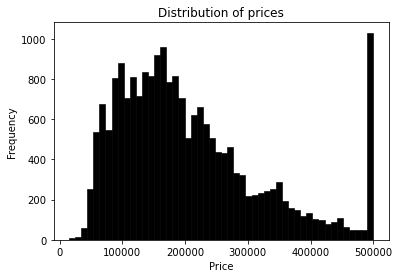

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()


In [8]:
data = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]
data_copy = data.copy()
data_copy

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1: find a feature with missing value and how many missing values are there?

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Question 2: What is the median for variable population?

In [10]:
df['population'].median()

1166.0

## Question 3: Best way to fill Nas

In [11]:
np.random.seed(42)

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

index = np.arange(n)
np.random.shuffle(index)
data_shuffled = data.iloc[index]
data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = data_train.median_house_value.values
y_val_orig = data_val.median_house_value.values
y_test_orig = data_test.median_house_value.values

y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

data_train
mean = data_train['total_bedrooms'].mean()
mean
data_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
10292,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327
16722,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798
11730,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
5993,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566


In [12]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [13]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    #print(df_num)
    X = df_num.values
    return X

In [14]:
def prepare_X_mean(df):
    df_num = df
    df_num = df_num.fillna(mean)
    print(df_num)
    X = df_num.values
    return X

## Fill null values with 0

In [15]:
X_train = prepare_X(data_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [16]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [17]:
score = rmse(y_train, y_pred)
train_score = round(score,2)
train_score

0.34

In [18]:
X_val = prepare_X(data_val)
y_pred = w_0 + X_val.dot(w)
score_val = rmse(y_val, y_pred)
val_score = round(score_val,2)
val_score

0.33

In [19]:
##fill null values with mean

In [20]:
X_train = prepare_X_mean(data_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

       latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
20046     36.06    -119.01                25.0       1505.0      533.480332   
3024      35.14    -119.46                30.0       2943.0      533.480332   
15663     37.80    -122.44                52.0       3830.0      533.480332   
20484     34.28    -118.72                17.0       3051.0      533.480332   
9814      36.62    -121.93                34.0       2351.0      533.480332   
...         ...        ...                 ...          ...             ...   
10292     33.88    -117.81                19.0       2265.0      283.000000   
16722     35.48    -120.68                15.0       2608.0      525.000000   
11730     38.98    -120.91                13.0       7689.0     1415.000000   
5993      34.09    -117.72                36.0       1473.0      328.000000   
15993     37.76    -122.47                34.0       2807.0      487.000000   

       population  households  median_income  
2004

In [21]:
score = rmse(y_train, y_pred)
train_score = round(score,2)
train_score

0.34

In [22]:
X_val = prepare_X_mean(data_val)
y_pred = w_0 + X_val.dot(w)
score_val = rmse(y_val, y_pred)
val_score = round(score_val,2)
val_score

       latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
19660     37.51    -120.85                15.0       1131.0           285.0   
4415      34.09    -118.25                52.0       1866.0           470.0   
18113     37.31    -122.02                34.0       2629.0           433.0   
17673     37.30    -121.88                16.0       2692.0           749.0   
16992     37.56    -122.27                17.0       3211.0           847.0   
...         ...        ...                 ...          ...             ...   
20011     36.05    -119.12                27.0       1575.0           321.0   
12225     33.65    -116.90                15.0        652.0           149.0   
1051      38.34    -120.71                16.0       1257.0           231.0   
14519     32.91    -117.13                16.0       2715.0           581.0   
11410     33.71    -117.93                10.0       2775.0           717.0   

       population  households  median_income  
1966

0.33

## Question 4: Find the smallest r

In [23]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
X_train = prepare_X(data_train)
X_val = prepare_X(data_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred).round(2))

     0 0.33
 1e-06 0.33
0.0001 0.33
 0.001 0.33
  0.01 0.33
   0.1 0.33
     1 0.33
     5 0.34
    10 0.34


## STD OF RMSE SCORES FOR DIFFERENT SEEDS

In [35]:
rmse_scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    n = len(data)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    index = np.arange(n)
    np.random.shuffle(index)
    #shuffled data
    data_shuffle = data.iloc[index]
    #training data
    data_training = data_shuffle.iloc[:n_train].copy()
    #validation data
    data_validation = data_shuffle.iloc[n_train:n_train+n_val].copy()
    #testing data
    data_testing = data_shuffle.iloc[n_train+n_val:].copy()
    y_training = np.log1p(data_training.median_house_value.values)
    y_validation = np.log1p(data_validation.median_house_value.values)
    del data_training['median_house_value']
    del data_validation['median_house_value']
    #x_train
    x_train = prepare_X(data_training)
    #x_val
    x_val = prepare_X(data_validation)
    #weights
    wt_0, wt = train_linear_regression(x_train, y_training)
    #y_pred
    y_predict = wt_0 + x_val.dot(wt)
    score = rmse(y_validation,y_predict)
    rmse_scores.append(score)
    
a = np.array(rmse_scores)
ans = np.std(a)
r_ans = round(ans,3)
ans


0.004170771946871995

## Question 6: RMSE on Test

In [26]:
np.random.seed(9)
n = len(data)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
index = np.arange(n)
np.random.shuffle(index)
data_shuffled = data.iloc[index]
#data_train = data_shuffled.iloc[:n_train].copy()
data_combined = data_shuffled.iloc[:n_train+n_val].copy()
y_combined = np.log1p(data_combined.median_house_value.values)
del data_combined['median_house_value']
test = data_shuffled.iloc[n_train+n_val:].copy()
y_combined_test = np.log1p(test.median_house_value.values)
del test['median_house_value']
X_train = prepare_X(data_combined)
X_test = prepare_X(test)
w_0, w = train_linear_regression_reg(X_train, y_combined,r = 0.001)
y_pred = w_0 + X_test.dot(w)
test_rmse = rmse(y_combined_test,y_pred)
test_rmse.round(2)

0.35